In [58]:
import pandas as pd
import pickle
import json
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import KeyedVectors
import numpy as np
import google_conf

import networkx as nx
import matplotlib.pyplot as plt

In [25]:
mops_data = google_conf.setup(
    sheet_url="https://docs.google.com/spreadsheets/d/1VbCIAJssHKV9hlRTwzVFfm40CGnHesq53KXjv2qy4OM/edit?usp=sharing",
    service_account_path="../../ServiceAccountsKey.json")

In [2]:
metadata_df = pd.read_json("../data/metadata_rich_df.json")

In [3]:
bidecades_strs = sorted([el for el in list(set(metadata_df["bidecade"])) if el != None])
bidecades_strs

['1900-1919', '1920-1939', '1940-1959', '1960-1979', '1980-1999', '2000-2019']

In [4]:
vectors_dict = {}
for bidecade in bidecades_strs:
    vectors_dict[bidecade] = KeyedVectors.load("../data/large_files/vectors_{0}_sample{1}.kv".format(bidecade, str(1000000)))

In [5]:
vectors_dict["1980-1999"].most_similar("Paul")

[('Pauls', 0.7435160279273987),
 ('Augustine', 0.6972004175186157),
 ('Origen', 0.6517276167869568),
 ('clement', 0.6188803315162659),
 ('Calvin', 0.6168031692504883),
 ('ephesian', 0.6132720708847046),
 ('Irenaeus', 0.6118727922439575),
 ('Gregory', 0.6112470626831055),
 ('thessalonian', 0.5964792370796204),
 ('Colossians', 0.5925448536872864)]

In [6]:
for bidecade in bidecades_strs:
    print(vectors_dict[bidecade].similarity("Paul", "jewish"))

0.15646729
0.20590428
0.14378823
0.20141602
0.22742748
0.16749758


In [13]:
bidecade_wordcounts = {}
for bidecade in bidecades_strs:
    bidecade_wordcounts[bidecade] = metadata_df[metadata_df["bidecade"]==bidecade]["wordCount"].sum()
bidecade_wordcounts

{'1900-1919': 5178524,
 '1920-1939': 5481199,
 '1940-1959': 11965635,
 '1960-1979': 19721863,
 '1980-1999': 46442633,
 '2000-2019': 139359545}

In [39]:
bidecades_vocabs_counts_df = pickle.load(open("../data/bidecades_vocabs_counts_df.pickle", "rb"))
bidecades_vocabs_counts_df.head(100)

,1900-1919,1920-1939,1940-1959,1960-1979,1980-1999,2000-2019
man,11218.0,8342.0,24108.0,39199.0,48435.0,100670.0
new,10183.0,10192.0,23469.0,42092.0,97421.0,293457.0
Jesus,9650.0,4911.0,12134.0,23416.0,49765.0,215687.0
et,9325.0,11818.0,20805.0,35969.0,49326.0,73464.0
God,9248.0,6276.0,26328.0,45751.0,99505.0,293240.0
...,...,...,...,...,...,...
apostle,2454.0,943.0,3288.0,4801.0,9336.0,21883.0
epistle,2431.0,1618.0,4003.0,4925.0,8343.0,18161.0
century,2427.0,3062.0,7516.0,10538.0,27068.0,96298.0
live,2427.0,2239.0,6810.0,9567.0,23213.0,77744.0


In [41]:
bidecades_vocabs_counts_df.fillna(0, inplace=True)

In [42]:
for bidecade in bidecades_strs:
    bidecades_vocabs_counts_df[bidecade + "_freq"] = bidecades_vocabs_counts_df[bidecade].apply(lambda x: x / bidecade_wordcounts[bidecade])

In [43]:
[col for col in bidecades_vocabs_counts_df.columns if "_freq" in col]

['1900-1919_freq',
 '1920-1939_freq',
 '1940-1959_freq',
 '1960-1979_freq',
 '1980-1999_freq',
 '2000-2019_freq']

In [44]:
bidecades_vocabs_counts_df["mean_freq"] = bidecades_vocabs_counts_df[[col for col in bidecades_vocabs_counts_df.columns if "_freq" in col]].apply(lambda row: np.mean(row), axis=1)
bidecades_vocabs_counts_df.sort_values("mean_freq", ascending=False, inplace=True)

In [45]:
bidecades_vocabs_counts_df.reset_index(inplace=True)
bidecades_vocabs_counts_df.head(100)

,index,1900-1919,1920-1939,1940-1959,1960-1979,1980-1999,2000-2019,1900-1919_freq,1920-1939_freq,1940-1959_freq,1960-1979_freq,1980-1999_freq,2000-2019_freq,mean_freq
0,new,10183.0,10192.0,23469.0,42092.0,97421.0,293457.0,0.001966,0.001859,0.001961,0.002134,0.002098,0.002106,0.002021
1,God,9248.0,6276.0,26328.0,45751.0,99505.0,293240.0,0.001786,0.001145,0.002200,0.002320,0.002143,0.002104,0.001950
2,Paul,8660.0,7217.0,19803.0,36061.0,100083.0,224979.0,0.001672,0.001317,0.001655,0.001828,0.002155,0.001614,0.001707
3,church,8091.0,7319.0,23104.0,39397.0,74688.0,214495.0,0.001562,0.001335,0.001931,0.001998,0.001608,0.001539,0.001662
4,see,7388.0,6783.0,18801.0,34552.0,97771.0,233655.0,0.001427,0.001238,0.001571,0.001752,0.002105,0.001677,0.001628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,case,2518.0,2565.0,4336.0,8278.0,25524.0,73865.0,0.000486,0.000468,0.000362,0.000420,0.000550,0.000530,0.000469
96,love,1874.0,1885.0,5850.0,10481.0,25420.0,72067.0,0.000362,0.000344,0.000489,0.000531,0.000547,0.000517,0.000465
97,begin,2158.0,2240.0,5284.0,9042.0,22299.0,79471.0,0.000417,0.000409,0.000442,0.000458,0.000480,0.000570,0.000463
98,biblical,1924.0,1255.0,4236.0,8867.0,27515.0,107965.0,0.000372,0.000229,0.000354,0.000450,0.000592,0.000775,0.000462


In [46]:
google_conf.set_with_dataframe(mops_data.add_worksheet("bidecades_vocabs_counts_df", 1,1), bidecades_vocabs_counts_df)

In [103]:
pauline = ["st","saint", "apostle", "Apostle", "apostolic"]

doctrine_theology = ["christianity", "faith", "theology", "theological", "doctrine", "body", "spirit", "soul", "belief", "sacrifice", "righteousness", "justification"]

academic = ["society", "social", "tradition", "historical", "community", "religious", "religion", "science", "critical", "model", "identity", "traditional", "economic", "gender", "explanation", "rhetorical", "scientific"]

jewishness = ["Jews", "Jew","law", "jewish", "Israel", "hebrew", "Jerusalem", "judaism", "Moses", "Abraham", "Hebrews"]

In [104]:
source = "Paul"
targets = pauline
bidecades_data = {}
for bidecade in bidecades_strs:
    topN_mean = np.mean([tup[1] for tup in vectors_dict[bidecade].most_similar(source, topn=10)])
    bidecade_list = []
    for target in targets:
        bidecade_list.append((source, target ,{"weight" : np.round(vectors_dict[bidecade].similarity("Paul", target) / topN_mean, 2)}))
    bidecades_data[bidecade] = bidecade_list

In [105]:
bidecades_data["1920-1939"]

[('Paul', 'st', {'weight': 0.42}),
 ('Paul', 'saint', {'weight': 0.72}),
 ('Paul', 'apostle', {'weight': 0.65}),
 ('Paul', 'Apostle', {'weight': 0.81}),
 ('Paul', 'apostolic', {'weight': 0.5})]

In [106]:
G = nx.Graph()
G.add_edges_from(bidecades_data["1920-1939"])

In [107]:
G.edges(data=True)

EdgeDataView([('Paul', 'st', {'weight': 0.42}), ('Paul', 'saint', {'weight': 0.72}), ('Paul', 'apostle', {'weight': 0.65}), ('Paul', 'Apostle', {'weight': 0.81}), ('Paul', 'apostolic', {'weight': 0.5})])

In [108]:
pos = nx.circular_layout(G.subgraph(targets))
pos['Paul'] = (0, 0)
pos# pos['Paul'] = (0, 0)

{'st': array([1., 0.]),
 'saint': array([0.30901695, 0.95105657]),
 'apostle': array([-0.80901706,  0.58778526]),
 'Apostle': array([-0.809017  , -0.58778532]),
 'apostolic': array([ 0.3090171 , -0.95105651]),
 'Paul': (0, 0)}

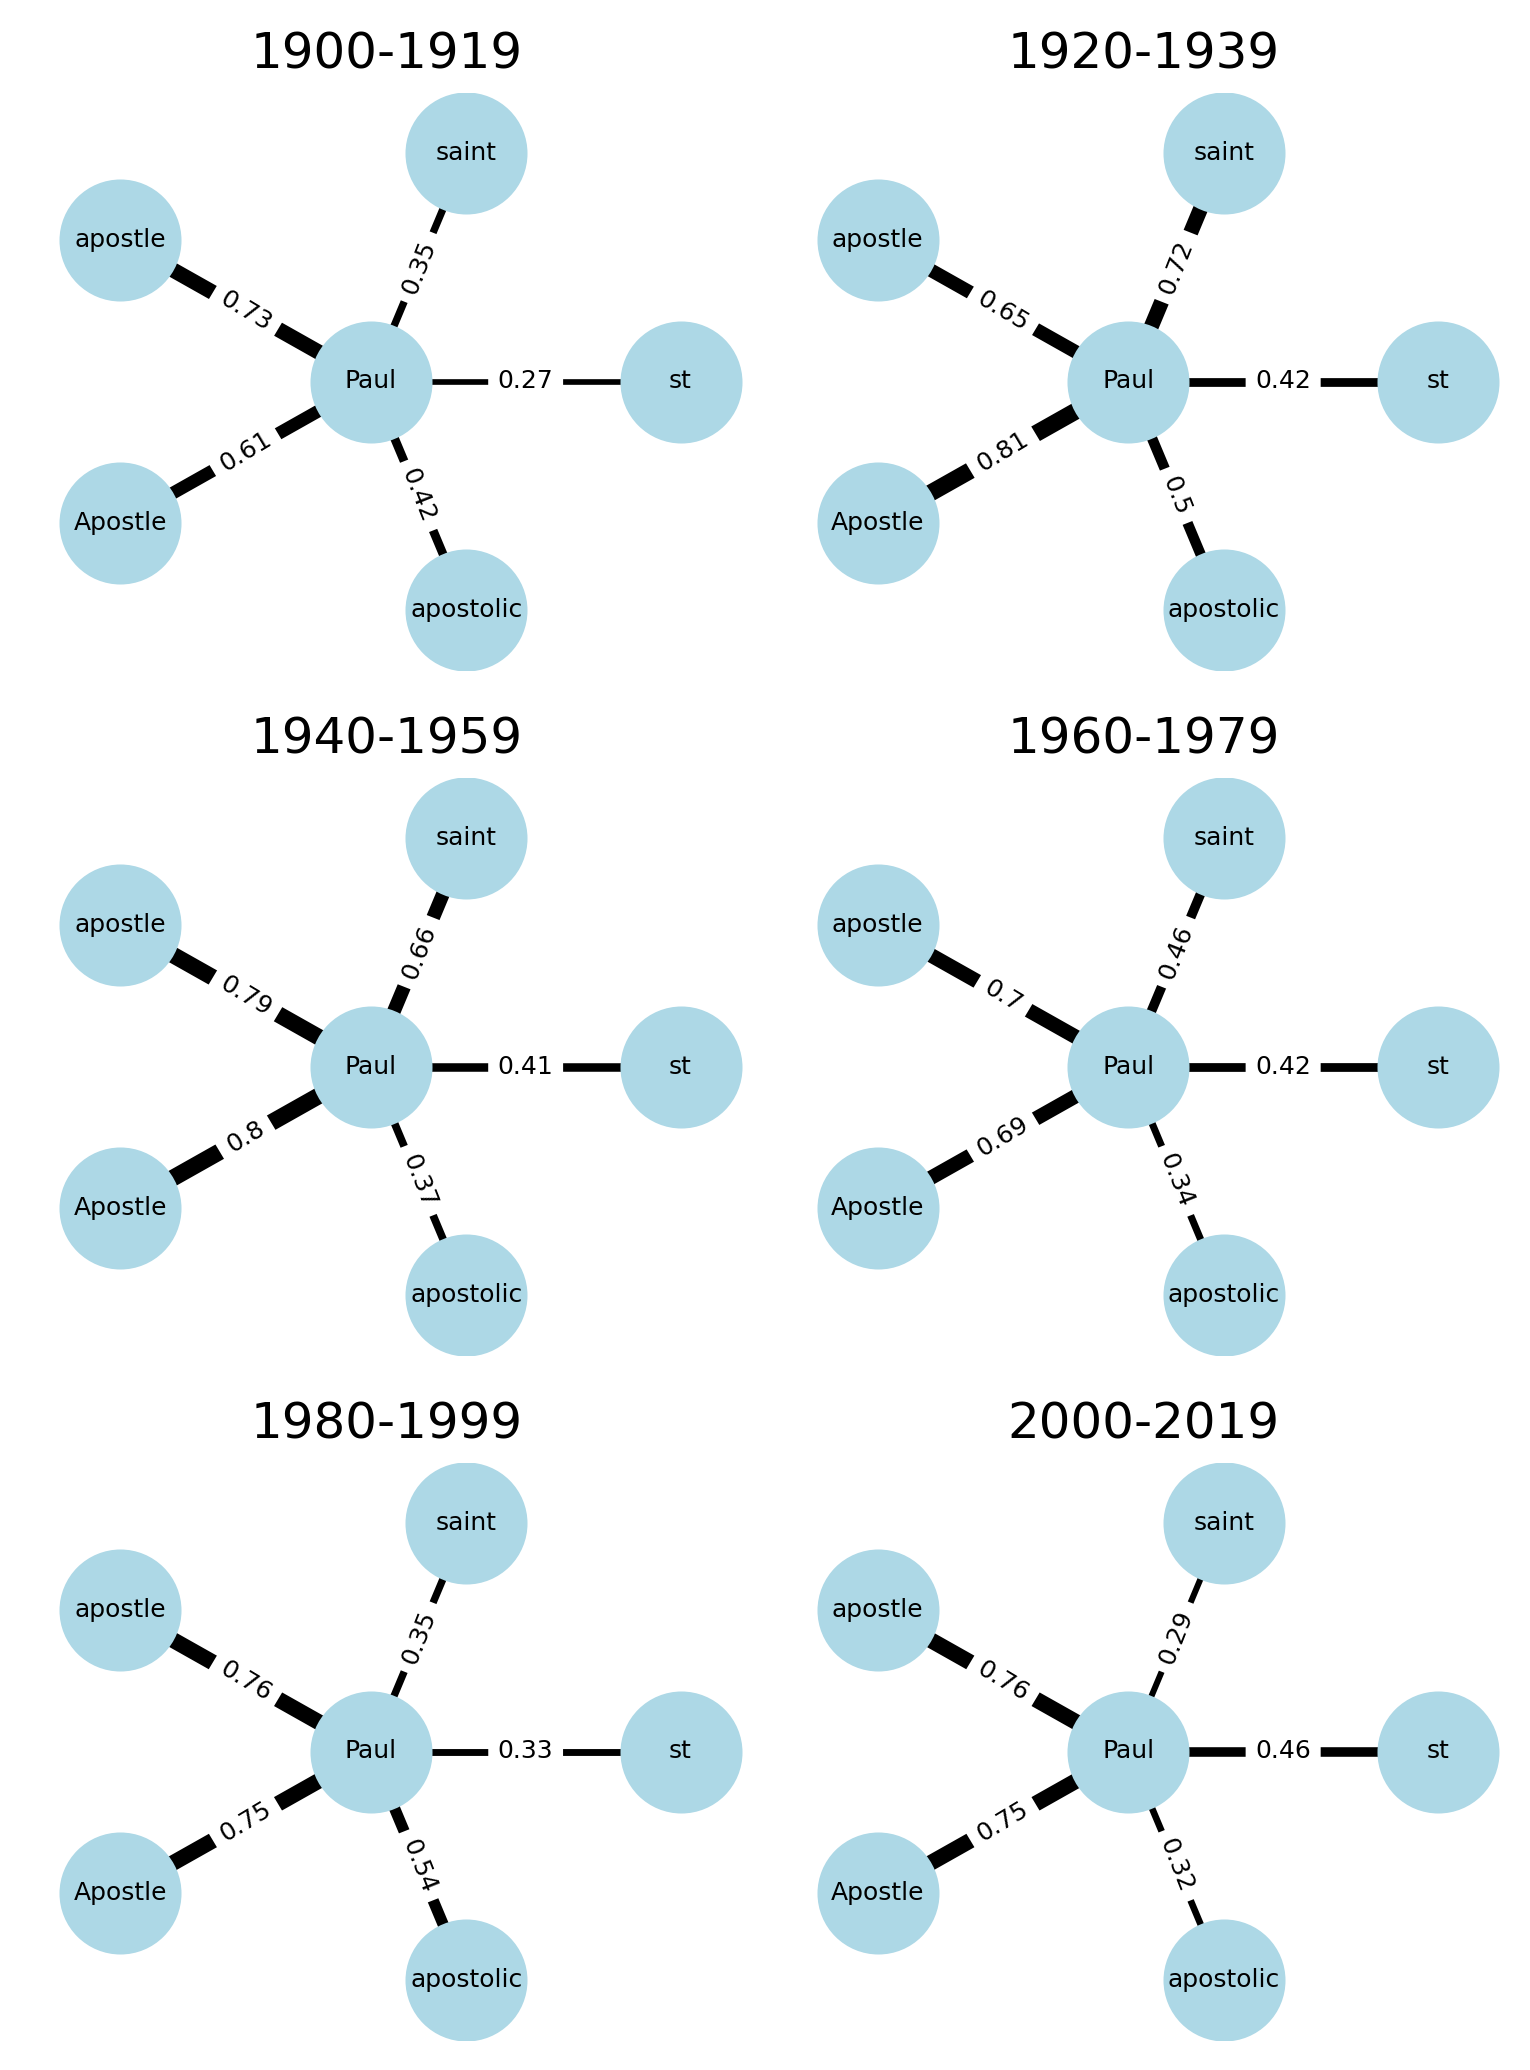

In [111]:
# Draw the graph with edge labels
fig, axs = plt.subplots(3,2, figsize=(5.2, 7), dpi=300, tight_layout=True)

for ax, bidecade in zip(axs.ravel(), bidecades_strs):
    G = nx.Graph()
    G.add_edges_from(bidecades_data[bidecade])
    edge_sizes = [w *5 for w in nx.get_edge_attributes(G, "weight").values()]
    nx.draw_networkx_nodes(G, pos, node_size=70, node_color="blue", edgecolors="black", ax=ax)#, cmap=plt.cm.binary, ax=ax)
    nx.draw(G, pos, with_labels=True, font_size=6, node_size=800, node_color='lightblue', ax=ax)
    nx.draw_networkx_edges(G, pos, width=edge_sizes, ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_size=6, ax=ax)
    ax.set_title(bidecade)
    ax.set_xlim(-1.1,1.2)
    ax.set_ylim(-1.2,1.2)



In [113]:
fig.savefig("../figures/paul_st_apostle.png")

In [57]:
pos = nx.circular_layout()cular_layout(G)

In [ ]:
fig, ax = plt.subplots(figsize=(5.7, 5.7), dpi=300, tight_layout=True)

In [ ]:
import networkx as nx

M = nx.from_numpy_matrix(matrix, parallel_edges=True, create_using=nx.MultiDiGraph)
M.remove_edges_from(nx.selfloop_edges(M))
M.edges(data=True)

In [ ]:

nodes_dict = dict([(i, {"correct": val}) for i, val in enumerate(matrix.diagonal())])
nodes_dict
G = nx.Graph()
for u, v, data in M.edges(data=True):
    w = data['weight'] if 'weight' in data else 0
    if G.has_edge(u, v):
        G[u][v]['weight'] = (G[u][v]['weight'] + w) / 2
    else:
        G.add_edge(u, v, weight=w)
nx.set_node_attributes(G, nodes_dict)
G = nx.relabel_nodes(G, labels_mapping)
G.nodes(data=True)
nx.get_edge_attributes(G, "weight")
pos = nx.circular_layout(G)
edge_sizes = [w * 20 for w in nx.get_edge_attributes(G, "weight").values()]
edge_sizes
# generate the node positions
color_vals = [val for val in list(nx.get_node_attributes(G, "correct").values())]
color_vals
color_vals_labels = ["white" if n > 0.5 else "black" for n in color_vals]
color_vals_labels
pos
for pos_tup, color in zip(pos.items(), color_vals_labels):
    (pos_tup[1][0], pos_tup[1][1], pos_tup[0])  #, font_size=6, c=color)
#, font_size=6, c=color)
fig, ax = plt.subplots(figsize=(5.7, 5.7), dpi=300, tight_layout=True)

nx.draw_networkx_nodes(G, pos, node_size=4000, node_color=color_vals, edgecolors="black", cmap=plt.cm.binary, ax=ax)
nx.draw_networkx_edges(G, pos, width=edge_sizes, ax=ax)
for pos_tup, color in zip(pos.items(), color_vals_labels):
    ax.text(pos_tup[1][0], pos_tup[1][1], pos_tup[0], size=8, c=color, horizontalalignment='center',
            verticalalignment='center')

ax.set_axis_off()